In [7]:
## get timeseries-data (here ERA5 as example)-------
from ERA5 import load_data,calculate_wind_speed,calculate_wind_direction,calculate_averages,check_data_gaps

Era5_path = 'data/reanalysis'  
start_year = 2000
end_year = 2023
    
Era5_data = load_data(Era5_path, start_year, end_year)
Era5_data = calculate_wind_speed(Era5_data)
Era5_data = calculate_wind_direction(Era5_data)
##--------------------------------------------------
data = Era5_data
 
#print(type(data))  
data.columns

Index(['Time [UTC]', 'u100', 'v100', 'u10', 'v10', 'WS100', 'WS10', 'WD100',
       'WD10'],
      dtype='object')

In [8]:
import numpy as np
import argparse
import matplotlib.pyplot as plt
from iwopy.interfaces.pymoo import Optimizer_pymoo

from iwopy import LocalFD
from iwopy.optimizers import GG

import foxes
import foxes.variables as FV
from foxes.opt.problems.layout import FarmLayoutOptProblem
from foxes.opt.constraints import FarmBoundaryConstraint, MinDistConstraint
from foxes.opt.objectives import MaxFarmPower

In [9]:
mbook = foxes.models.ModelBook()
ttype = foxes.models.turbine_types.PCtFile("NREL-5MW-D126-H90.csv")
mbook.turbine_types[ttype.name] = ttype

boundary = foxes.utils.geom2d.Circle([0.0, 0.0], 1000.0)

farm = foxes.WindFarm(boundary=boundary)
foxes.input.farm_layout.add_row(
    farm=farm,
    xy_base=np.zeros(2),
    xy_step=np.array([50.0, 0.0]),
    n_turbines=10,
    turbine_models=["kTI_02", ttype.name],
)


Turbine 0, T0: kTI_02, NREL-5MW
Turbine 1, T1: kTI_02, NREL-5MW
Turbine 2, T2: kTI_02, NREL-5MW
Turbine 3, T3: kTI_02, NREL-5MW
Turbine 4, T4: kTI_02, NREL-5MW
Turbine 5, T5: kTI_02, NREL-5MW
Turbine 6, T6: kTI_02, NREL-5MW
Turbine 7, T7: kTI_02, NREL-5MW
Turbine 8, T8: kTI_02, NREL-5MW
Turbine 9, T9: kTI_02, NREL-5MW


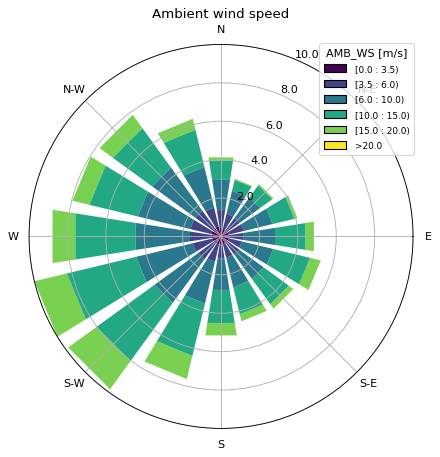

In [10]:
# 2. create the states object and have a look at the wind rose, look at input States 
#    Wind and other atmospheric inflow conditions are called `States`
states = foxes.input.states.Timeseries(                           # StatesTable for panda df or pd readable file (single height)
    data_source = data ,                                           # the data
    output_vars = [FV.WS, FV.WD, FV.TI, FV.RHO],
    var2col =     {FV.WS: "WS100", FV.WD: "WD100", FV.TI: "ti"}, # Mapping from variable names to data column names

    fixed_vars =  {FV.RHO: 1.225, FV.TI: 0.05},                  # ?? what is TI ?? sometimes also 0.08
)
# Plot windrose
o = foxes.output.StatesRosePlotOutput(states, point=[0., 0., 100.])
fig = o.get_figure(16, FV.AMB_WS, [0, 3.5, 6, 10, 15, 20], figsize=(6, 6))
plt.show()

Turbine 0, T0: NREL-5MW
Turbine 1, T1: NREL-5MW
Turbine 2, T2: NREL-5MW
Turbine 3, T3: NREL-5MW
Turbine 4, T4: NREL-5MW
Turbine 5, T5: NREL-5MW
Turbine 6, T6: NREL-5MW
Turbine 7, T7: NREL-5MW
Turbine 8, T8: NREL-5MW
Turbine 9, T9: NREL-5MW
Problem 'layout_opt' (FarmLayoutOptProblem): Initializing
---------------------------------------------------------
  n_vars_int  : 0
  n_vars_float: 20
---------------------------------------------------------
  n_objectives: 1
  n_obj_cmptns: 1
---------------------------------------------------------
  n_constraints: 1
  n_con_cmptns: 10
---------------------------------------------------------
Loading pymoo
pymoo successfully loaded
Initializing Optimizer_pymoo
Selecting sampling: float_random (FloatRandomSampling)
Selecting algorithm: GA (GA)
Selecting termination: default (DefaultSingleObjectiveTermination)

Problem:
--------
  vectorize: False

Algorithm:
----------
  type: GA
  pop_size: 50

Termination:
------------
  n_max_gen: 100
  ftol: 

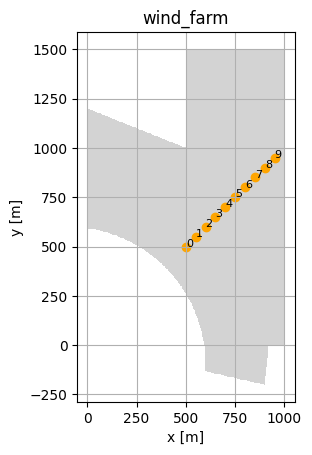

n_gen  |  n_eval  |     cv_min    |     cv_avg    |     f_avg     |     f_min    
     1 |       50 |  0.000000E+00 |  5.850301E+02 | -5.496685E-01 | -5.496685E-01
     2 |      100 |  0.000000E+00 |  2.167969E+02 | -5.527317E-01 | -5.551023E-01
     3 |      150 |  0.000000E+00 |  8.622685E+01 | -5.536012E-01 | -5.618044E-01
     4 |      200 |  0.000000E+00 |  2.181117E+01 | -5.525610E-01 | -5.626258E-01
     5 |      250 |  0.000000E+00 |  0.8262286117 | -5.516792E-01 | -5.638115E-01
     6 |      300 |  0.000000E+00 |  0.000000E+00 | -5.555349E-01 | -5.638115E-01
     7 |      350 |  0.000000E+00 |  0.000000E+00 | -5.584736E-01 | -5.638115E-01
     8 |      400 |  0.000000E+00 |  0.000000E+00 | -5.602319E-01 | -5.643040E-01
     9 |      450 |  0.000000E+00 |  0.000000E+00 | -5.613518E-01 | -5.662270E-01
    10 |      500 |  0.000000E+00 |  0.000000E+00 | -5.624266E-01 | -5.662270E-01
    11 |      550 |  0.000000E+00 |  0.000000E+00 | -5.630475E-01 | -5.662270E-01
    12 |      60

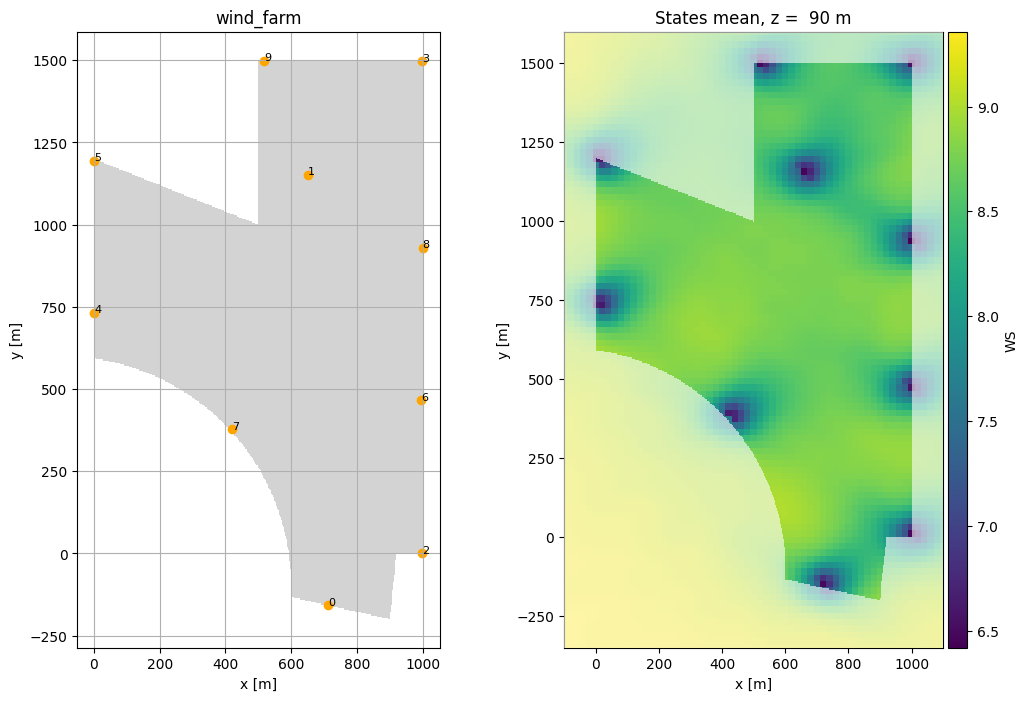

In [11]:

mbook = foxes.models.ModelBook()
ttype = foxes.models.turbine_types.PCtFile("NREL-5MW-D126-H90.csv")
mbook.turbine_types[ttype.name] = ttype

boundary = (
    foxes.utils.geom2d.ClosedPolygon(
        np.array([[0, 0], [0, 1200], [1000, 800], [900, -200]], dtype=np.float64)
    )
    + foxes.utils.geom2d.ClosedPolygon(
        np.array([[500, 0], [500, 1500], [1000, 1500], [1000, 0]], dtype=np.float64)
    )
    - foxes.utils.geom2d.Circle([-100.0, -100.0], 700)
)

farm = foxes.WindFarm(boundary=boundary)
foxes.input.farm_layout.add_row(
    farm=farm,
    xy_base=np.array([500.0, 500.0]),
    xy_step=np.array([50.0, 50.0]),
    n_turbines=10,
    turbine_models=[ttype.name],
)

states = foxes.input.states.StatesTable(
    data_source="wind_rose_bremen.csv",
    output_vars=[FV.WS, FV.WD, FV.TI, FV.RHO],
    var2col={FV.WS: "ws", FV.WD: "wd", FV.WEIGHT: "weight"},
    fixed_vars={FV.RHO: 1.225, FV.TI: 0.04},
)

algo = foxes.algorithms.Downwind(
    farm,
    states,
    rotor_model="centre",
    wake_models=["Bastankhah025_quadratic_k002"],
    wake_frame="rotor_wd",
    partial_wakes=None,
    mbook=mbook,
    verbosity=0,
)

with foxes.utils.runners.DaskRunner(
    scheduler=None,
    n_workers=None,
    threads_per_worker=None,
    progress_bar=False,
    verbosity=1,
) as runner:
    problem = FarmLayoutOptProblem("layout_opt", algo, runner=runner)
    problem.add_objective(MaxFarmPower(problem))
    problem.add_constraint(FarmBoundaryConstraint(problem))
    if None is not None:
        problem.add_constraint(
            MinDistConstraint(problem, min_dist=10, min_dist_unit="D")
        )
    problem.initialize()

    solver = Optimizer_pymoo(
        problem,
        problem_pars=dict(
            vectorize=not "store_true",
        ),
        algo_pars=dict(
            type="GA",
            pop_size=50,
            seed=None,
        ),
        setup_pars=dict(),
        term_pars=dict(
            type="default",
            n_max_gen=100,
            ftol=1e-6,
            xtol=1e-6,
        ),
    )
    solver.initialize()
    solver.print_info()

    ax = foxes.output.FarmLayoutOutput(farm).get_figure()
    plt.show()
    plt.close(ax.get_figure())

    results = solver.solve()
    solver.finalize(results)

    print()
    print(results)

    fig, axs = plt.subplots(1, 2, figsize=(12, 8))

    foxes.output.FarmLayoutOutput(farm).get_figure(fig=fig, ax=axs[0])

    o = foxes.output.FlowPlots2D(algo, results.problem_results)
    p_min = np.array([-100.0, -350.0])
    p_max = np.array([1100.0, 1600.0])
    fig = o.get_mean_fig_xy(
        "WS",
        resolution=20,
        fig=fig,
        ax=axs[1],
        xmin=p_min[0],
        xmax=p_max[0],
        ymin=p_min[1],
        ymax=p_max[1],
    )
    dpars = dict(alpha=0.6, zorder=10, p_min=p_min, p_max=p_max)
    farm.boundary.add_to_figure(
        axs[1], fill_mode="outside_white", pars_distance=dpars
    )

    plt.show()
    plt.close(fig)

In [6]:
#new test
mbook = foxes.models.ModelBook()
ttype = foxes.models.turbine_types.PCtFile("NREL-5MW-D126-H90.csv")
mbook.turbine_types[ttype.name] = ttype

boundary = (
    foxes.utils.geom2d.ClosedPolygon(
        np.array([[0, 0], [0, 1200], [1000, 800], [900, -200]], dtype=np.float64)
    )
    + foxes.utils.geom2d.ClosedPolygon(
        np.array([[500, 0], [500, 1500], [1000, 1500], [1000, 0]], dtype=np.float64)
    )
    - foxes.utils.geom2d.Circle([-100.0, -100.0], 700)
)

farm = foxes.WindFarm(boundary=boundary)
foxes.input.farm_layout.add_row(
    farm=farm,
    xy_base=np.array([500.0, 500.0]),
    xy_step=np.array([50.0, 50.0]),
    n_turbines=8,
    turbine_models=[ttype.name],
)

states = foxes.input.states.StatesTable(
    data_source="wind_rose_bremen.csv",
    output_vars=[FV.WS, FV.WD, FV.TI, FV.RHO],
    var2col={FV.WS: "ws", FV.WD: "wd", FV.WEIGHT: "weight"},
    fixed_vars={FV.RHO: 1.225, FV.TI: 0.05},
)

algo = foxes.algorithms.Downwind(
    farm,
    states,
    rotor_model="centre",
    wake_models=["Bastankhah025_linear_k002"],
    wake_frame="rotor_wd",
    partial_wakes=None,
    mbook=mbook,
    verbosity=0,
)

with foxes.utils.runners.DaskRunner(
    scheduler=None,
    n_workers=None,
    threads_per_worker=None,
    progress_bar=False,
    verbosity=1,
) as runner:
    problem = FarmLayoutOptProblem("layout_opt", algo, runner=runner)
    problem.add_objective(MaxFarmPower(problem))
    problem.add_constraint(FarmBoundaryConstraint(problem))
    if None is not None:
        problem.add_constraint(
            MinDistConstraint(problem, min_dist=100, min_dist_unit="D")
        )
    gproblem = LocalFD(problem, deltas=0.1, fd_order=1)
    gproblem.initialize()

    solver = GG(
        gproblem,
        step_max=100.0,
        step_min=0.1,
        f_tol=1e-4,
        vectorized=not "store_true",  #!
    )
    solver.initialize()
    solver.print_info()

    ax = foxes.output.FarmLayoutOutput(farm).get_figure()
    plt.show()
    plt.close(ax.get_figure())

    results = solver.solve()
    solver.finalize(results)

    print()
    print(results)

    fig, axs = plt.subplots(1, 2, figsize=(12, 8))

    foxes.output.FarmLayoutOutput(farm).get_figure(fig=fig, ax=axs[0])

    o = foxes.output.FlowPlots2D(algo, results.problem_results)
    p_min = np.array([-100.0, -350.0])
    p_max = np.array([1100.0, 1600.0])
    fig = o.get_mean_fig_xy(
        "WS",
        resolution=20,
        fig=fig,
        ax=axs[1],
        xmin=p_min[0],
        xmax=p_max[0],
        ymin=p_min[1],
        ymax=p_max[1],
    )
    dpars = dict(alpha=0.6, zorder=10, p_min=p_min, p_max=p_max)
    farm.boundary.add_to_figure(
        axs[1], fill_mode="outside_white", pars_distance=dpars
    )

    plt.show()
    plt.close(fig)


KeyboardInterrupt: 

In [ ]:
# define the algorithm and the layout optimization problem. 
algo = foxes.algorithms.Downwind(
    farm,
    states,
    rotor_model="centre",
    wake_models=["Bastankhah025_linear_k002"],
    partial_wakes=None,
    wake_frame="rotor_wd",
    mbook=mbook,
    verbosity=0,
)


with foxes.utils.runners.DaskRunner(
    scheduler=None,
    n_workers=2,
    threads_per_worker=2,
    progress_bar=False,
    verbosity=1,
) as runner:
    # The Problem to soleve + objectives and constraints
    problem = FarmLayoutOptProblem("layout_opt", algo, runner=runner)
    problem.add_objective(MaxFarmPower(problem))
    problem.add_constraint(FarmBoundaryConstraint(problem, disc_inside=True))
    
    if None is not None:    # add min_dis here
        problem.add_constraint(
            MinDistConstraint(problem, min_dist=100, min_dist_unit="D")
        )
        
    problem.initialize()
    #select the optimizer 
    solver = Optimizer_pymoo(
        problem,
        problem_pars=dict(            vectorize=not "store_true",),
        algo_pars=dict(
         type="GA",
         pop_size=50,      # the number of layouts per generation,  more Turbines require mor Layouts or we won't get a success
         seed=42,          # the random seed, for reproducible results
        ),
        setup_pars=dict(),
        term_pars=dict(
            type="default",
            n_max_gen=6,   # max number of generations
            ftol=1e-6,
            xtol=1e-6,
        ),
    )
    solver.initialize()
    solver.print_info()
    
    # Layout to optimize 
    ax = foxes.output.FarmLayoutOutput(farm).get_figure()
    plt.show()
    plt.close(ax.get_figure())
    
    # run the optimization:
    results = solver.solve()
    solver.finalize(results)

    print()
    print(results)

    fig, axs = plt.subplots(1, 2, figsize=(12, 8))

    foxes.output.FarmLayoutOutput(farm).get_figure(fig=fig, ax=axs[0])

    o = foxes.output.FlowPlots2D(algo, results.problem_results)
    p_min = np.array([-1100.0, -1100.0])
    p_max = np.array([1100.0, 1100.0])
    fig = o.get_mean_fig_xy(
        "WS",
        resolution=20,
        fig=fig,
        ax=axs[1],
        xmin=p_min[0],
        xmax=p_max[0],
        ymin=p_min[1],
        ymax=p_max[1],
    )
    dpars = dict(alpha=0.6, zorder=10, p_min=p_min, p_max=p_max)
    farm.boundary.add_to_figure(
        axs[1], fill_mode="outside_white", pars_distance=dpars
    )

    plt.show()
    plt.close(fig)
